In [14]:
!pip3 install opencv-python

In [1]:
import cv2
import os
import numpy as np
import pickle
from matplotlib import pyplot as plt

# Load and Preprocess the Dataset

In [2]:
def load_dataset(dataset_path):
    images = []
    labels = []
    for emotion in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion)
        for image_filename in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(emotion)
    return images, labels

dataset_path = "/Users/baltejsingh/Desktop/DIP/project/dataset"
images, labels = load_dataset(dataset_path)

In [3]:
def load_subset_of_dataset(dataset_path, subset_size=5):
    images = []
    labels = []

    for emotion in os.listdir(dataset_path):
        emotion_path = os.path.join(dataset_path, emotion)
        for i, image_filename in enumerate(os.listdir(emotion_path)):
            if i >= subset_size:
                break
            image_path = os.path.join(emotion_path, image_filename)
            image = cv2.imread(image_path)
            images.append(image)
            labels.append(emotion)

    return images, labels

dataset_path = "/Users/baltejsingh/Desktop/DIP/project/dataset"
subset_size = 5

subset_images, subset_labels = load_subset_of_dataset(dataset_path, subset_size)

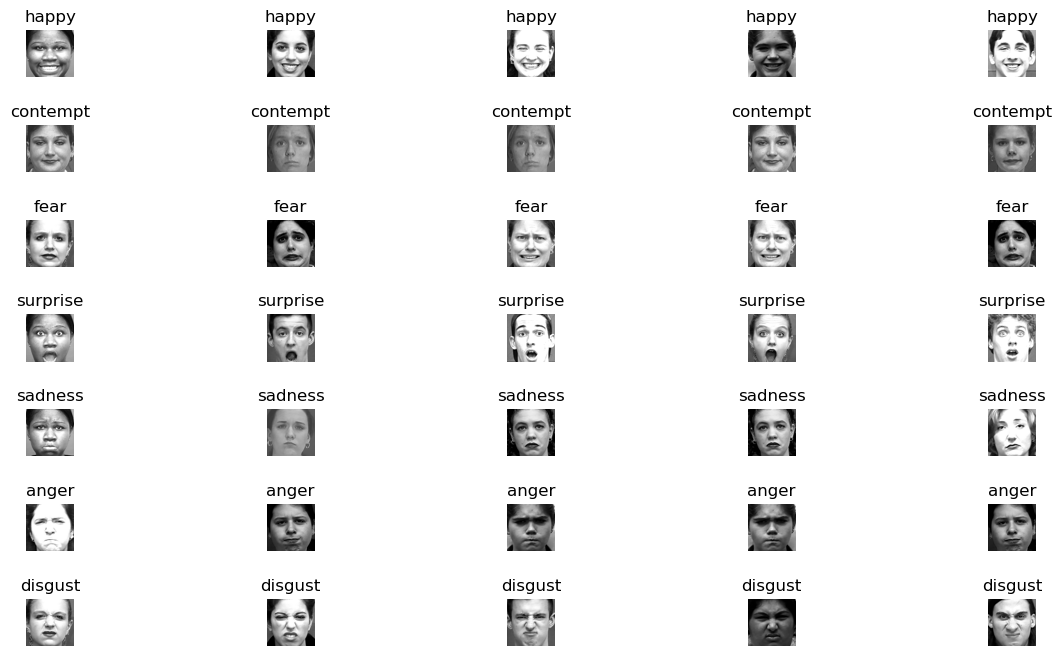

In [4]:
num_columns = 5

num_images = len(subset_images)
num_rows = (num_images + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 8))

axes = axes.flatten()

for i in range(num_images):
    image = subset_images[i]
    label = subset_labels[i]

    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[i].set_title(label)
    axes[i].axis('off')

for i in range(num_images, num_rows * num_columns):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=1)
plt.show()

# Preprocess the Images

In [59]:
def preprocess_image(image, target_size=(84, 128)):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(gray_image, target_size)
    return resized_image

preprocessed_images = [preprocess_image(image) for image in images]

# Feature Extraction - HOG (Histogram of Oriented Gradients)

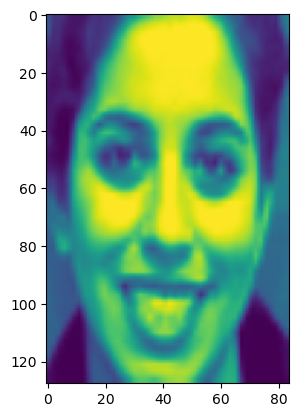

In [75]:
from skimage.feature import hog

def extract_hog_features(image):
    features = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2))
    return features

hog_features = [extract_hog_features(image) for image in preprocessed_images]

original_image = images[1]
image = preprocessed_images[1]

plt.imshow(image)

plt.show()

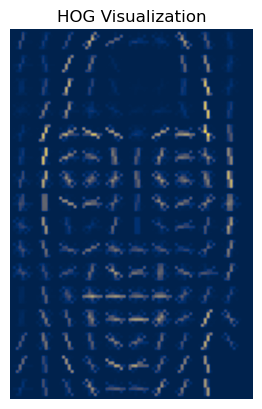

In [76]:
feature, _ = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
plt.imshow(_, cmap='cividis')
plt.title("HOG Visualization")
plt.axis('off')
plt.show()

# Split the Data into Training and Testing Sets

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hog_features, labels, test_size=0.25, random_state=42)

# Classification

**1. SVM**

In [78]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear', C=1)
classifier.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [79]:
y_pred = classifier.predict(X_test)

**2. KNN**

In [80]:
from sklearn.neighbors import KNeighborsClassifier

k = 2
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [81]:
y_predict = knn_classifier.predict(X_test)

**3. Random Forest**

In [82]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100
random_forest_classifier = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_prediction = random_forest_classifier.predict(X_test)

In [84]:
hog_svm_pipeline = (hog_features, classifier)

with open('hog_svm_pipeline.pkl', 'wb') as pipeline_file:
    pickle.dump(hog_svm_pipeline, pipeline_file)

# Evaluate the Classifier

**SVM**

Accuracy: 0.9878048780487805 



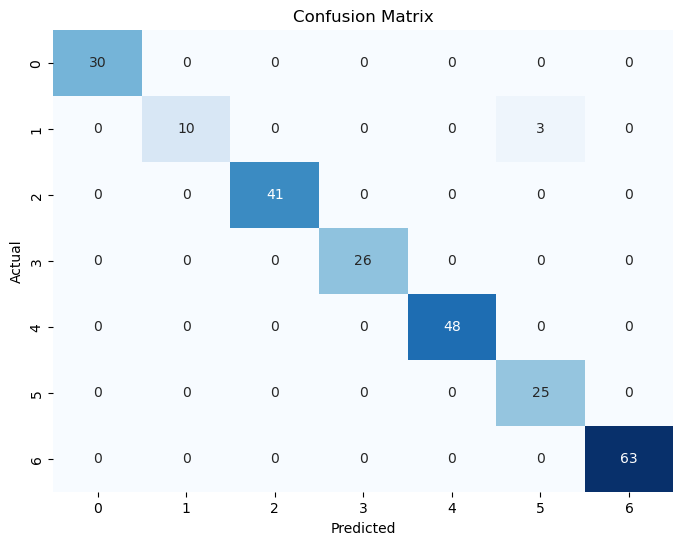



Classification Report:
              precision    recall  f1-score   support

       anger       1.00      1.00      1.00        30
    contempt       1.00      0.77      0.87        13
     disgust       1.00      1.00      1.00        41
        fear       1.00      1.00      1.00        26
       happy       1.00      1.00      1.00        48
     sadness       0.89      1.00      0.94        25
    surprise       1.00      1.00      1.00        63

    accuracy                           0.99       246
   macro avg       0.98      0.97      0.97       246
weighted avg       0.99      0.99      0.99       246
 

Macro F1 Score: 0.97 

Micro F1 Score: 0.99 



In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
import seaborn as sns

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
macro_f1 = f1_score(y_test, y_pred, average='macro')
micro_f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**KNN**

Accuracy: 0.8130081300813008 



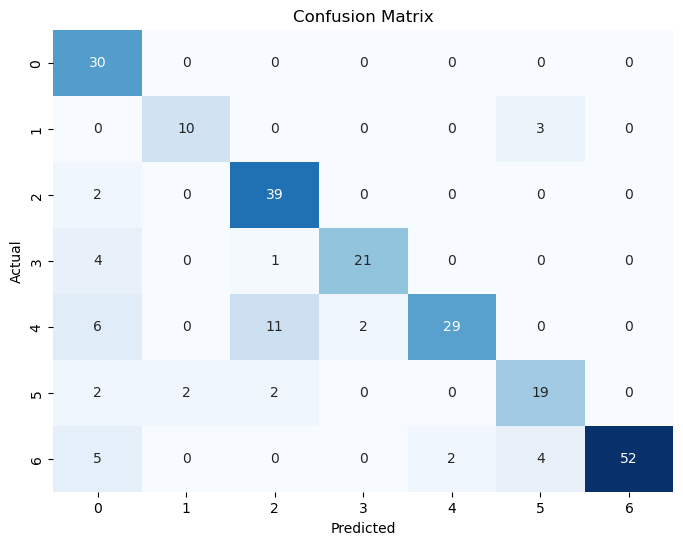



Classification Report:
              precision    recall  f1-score   support

       anger       0.61      1.00      0.76        30
    contempt       0.83      0.77      0.80        13
     disgust       0.74      0.95      0.83        41
        fear       0.91      0.81      0.86        26
       happy       0.94      0.60      0.73        48
     sadness       0.73      0.76      0.75        25
    surprise       1.00      0.83      0.90        63

    accuracy                           0.81       246
   macro avg       0.82      0.82      0.80       246
weighted avg       0.85      0.81      0.81       246
 

Macro F1 Score: 0.80 

Micro F1 Score: 0.81 



In [86]:
accuracy = accuracy_score(y_test, y_predict)
cm = confusion_matrix(y_test, y_predict)
report = classification_report(y_test, y_predict)
macro_f1 = f1_score(y_test, y_predict, average='macro')
micro_f1 = f1_score(y_test, y_predict, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')

**Random Forest**

Accuracy: 0.9715447154471545 



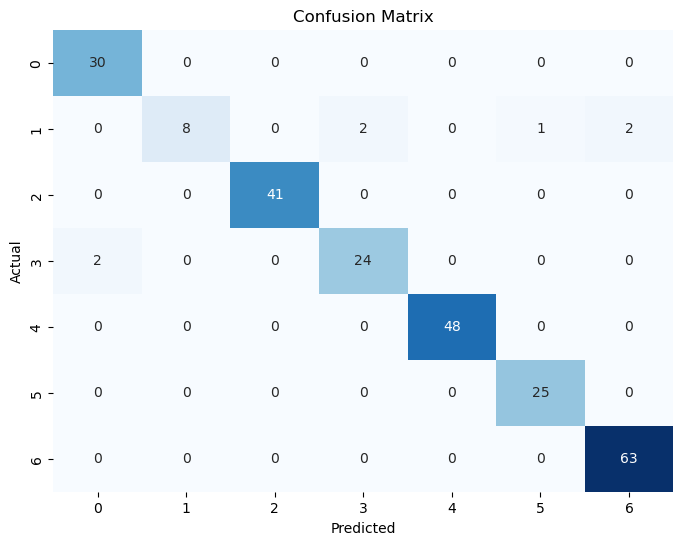



Classification Report:
              precision    recall  f1-score   support

       anger       0.94      1.00      0.97        30
    contempt       1.00      0.62      0.76        13
     disgust       1.00      1.00      1.00        41
        fear       0.92      0.92      0.92        26
       happy       1.00      1.00      1.00        48
     sadness       0.96      1.00      0.98        25
    surprise       0.97      1.00      0.98        63

    accuracy                           0.97       246
   macro avg       0.97      0.93      0.95       246
weighted avg       0.97      0.97      0.97       246
 

Macro F1 Score: 0.95 

Micro F1 Score: 0.97 



In [87]:
accuracy = accuracy_score(y_test, y_prediction)
cm = confusion_matrix(y_test, y_prediction)
report = classification_report(y_test, y_prediction)
macro_f1 = f1_score(y_test, y_prediction, average='macro')
micro_f1 = f1_score(y_test, y_prediction, average='micro')

print("Accuracy:", accuracy, '\n')

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print('\n')

print("Classification Report:")
print(report, '\n')
print(f"Macro F1 Score: {macro_f1:.2f}", '\n')
print(f"Micro F1 Score: {micro_f1:.2f}", '\n')